In [1]:
from tensorflow import keras
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.xception import Xception
from keras.applications.xception import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
IMAGE_SIZE = [224, 224]

In [7]:
!ls '/content/drive'

MyDrive


In [8]:
train_path = '/content/drive/MyDrive/AI_MAJOR/dataset/training'
test_path = '/content/drive/MyDrive/AI_MAJOR/dataset/testing'

Working with 138 images
Image examples: 
download (1).jpg


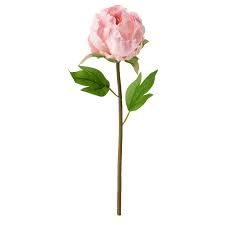

download (6).jpg


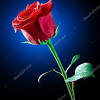

download (2).jpg


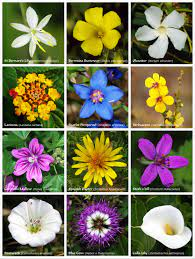

download (5).jpg


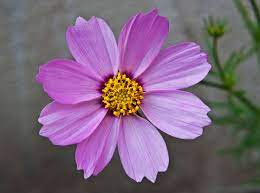

download.jpg


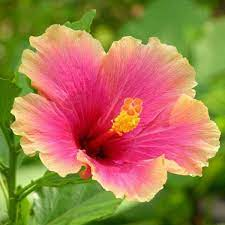

download (4).jpg


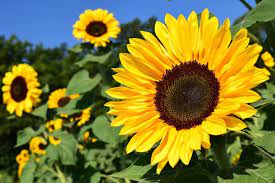

download (3).jpg


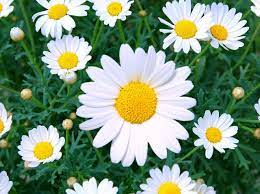

download.png


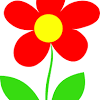

71etj1mmV9L._AC_SX522_.jpg


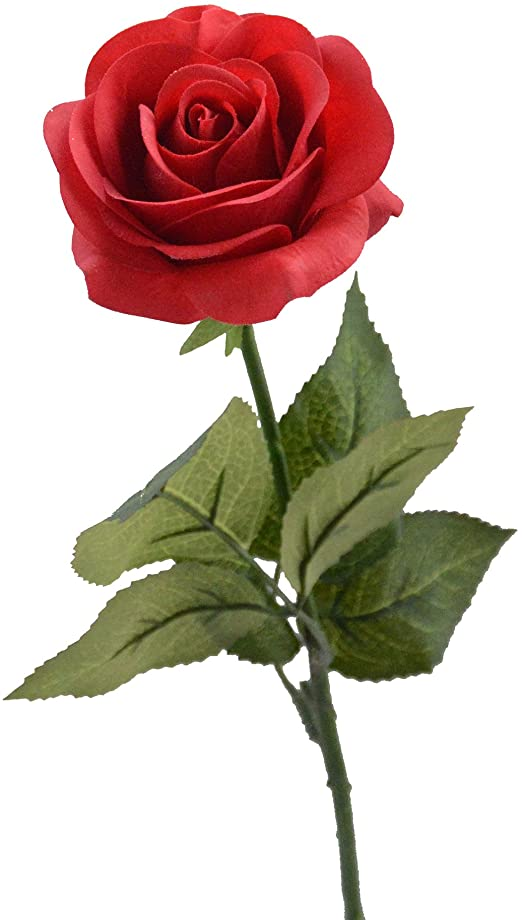

marguerite-729510__340.jpg


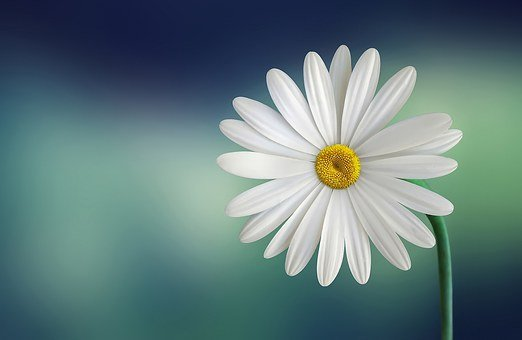

In [9]:
from PIL import Image 
import os 
from IPython.display import display
from IPython.display import Image as _Imgdis 

  
folder = train_path+'/flowers'


onlyflowersfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(onlyflowersfiles)))
print("Image examples: ")


for i in range(10):
    print(onlyflowersfiles[i])
    display(_Imgdis(filename=folder + "/" + onlyflowersfiles[i], width=240, height=240))

In [10]:
Xception = Xception(input_shape = IMAGE_SIZE + [3] , weights = 'imagenet' ,include_top = False)
Xception.output

83697664/83683744 [==============================] - 1s 0us/step


<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'block14_sepconv2_act')>

In [11]:
Xception.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [12]:
for layer in Xception.layers:
  layer.trainable = False

In [13]:
folders = glob('/content/drive/MyDrive/AI_MAJOR/dataset/training/*')
print(len(folders))

4


In [14]:
x = Flatten()(Xception.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=Xception.input, outputs=prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

In [16]:
from keras import optimizers

adam = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [17]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [18]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [19]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 550 images belonging to 4 classes.


In [20]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 288 images belonging to 4 classes.


In [21]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint


checkpoint = ModelCheckpoint(filepath='.hdf5', 
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()
batch_size = 32
model_history=model.fit(train_set, validation_data=test_set, epochs=25, 
                        steps_per_epoch=int(550/batch_size), validation_steps=int(288/batch_size),
                        callbacks=callbacks ,verbose=2)

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/25

Epoch 1: val_loss improved from inf to 1.24163, saving model to .hdf5
17/17 - 178s - loss: 2.8738 - accuracy: 0.6988 - val_loss: 1.2416 - val_accuracy: 0.8924 - 178s/epoch - 10s/step
Epoch 2/25

Epoch 2: val_loss improved from 1.24163 to 0.65846, saving model to .hdf5
17/17 - 33s - loss: 0.6554 - accuracy: 0.9131 - val_loss: 0.6585 - val_accuracy: 0.9132 - 33s/epoch - 2s/step
Epoch 3/25

Epoch 3: val_loss improved from 0.65846 to 0.63289, saving model to .hdf5
17/17 - 32s - loss: 0.5417 - accuracy: 0.9402 - val_loss: 0.6329 - val_accuracy: 0.9306 - 32s/epoch - 2s/step
Epoch 4/25

Epoch 4: val_loss did not improve from 0.63289
17/17 - 32s - loss: 0.4615 - accuracy: 0.9459 - val_loss: 1.0578 - val_accuracy: 0.8854 - 32s/epoch - 2s/step
Epoch 5/25

Epoch 5: val_loss improved from 0.63289 to 0.34240, saving model to .hdf5
17/17 - 32s - loss: 0.1851 - accuracy: 0.9672 - val_loss: 0.3424 - val_accuracy: 0.9549 - 32s/epoch - 2s/step
Epoch 6/25

Epoch 6: val_loss did not improve fr

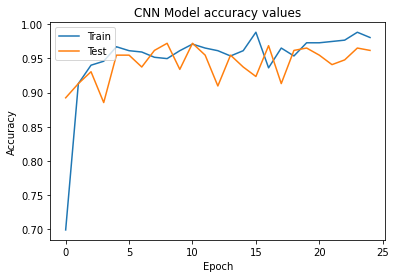

In [22]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()